In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers

In [11]:
df = pd.read_csv('../data.csv')
y = [1 if x == 'M' else 0 for x in df['diagnosis']]


X = df.drop(['diagnosis', 'Unnamed: 32'], axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X.shape

(569, 31)

In [84]:
X = np.array(X)    # accepts df for x and check for y
latent_space = 2

input_layer = keras.Input(shape = (31,))
encoded = layers.Dense(10, activation='relu')(input_layer)
encoded = layers.Dense(latent_space, activation='relu')(encoded)

decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dense(31, activation='linear')(decoded)

In [85]:
encoder = keras.Model(input_layer, encoded)
autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X, X,
                epochs=100,
                batch_size=16,
                shuffle = True,
                validation_split = 0.1)

Epoch 1/100
32/32 [==============================] - 0s 9ms/step - loss: 0.9995 - val_loss: 0.8333
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9198 - val_loss: 0.7596
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8290 - val_loss: 0.6918
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7626 - val_loss: 0.6502
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7280 - val_loss: 0.6257
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7082 - val_loss: 0.6085
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - val_loss: 0.5954
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6849 - val_loss: 0.5849
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - val_loss: 0.5766
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6685 - val_loss: 0.5692
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.3716 - val_loss: 0.3475
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3709 - val_loss: 0.3454
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 0.3450
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 0.3455
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3697 - val_loss: 0.3456
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3691 - val_loss: 0.3451
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3688 - val_loss: 0.3470
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3679 - val_loss: 0.3439
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3682 - val_loss: 0.3447
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3668 - val_loss: 0.3441
Epoch 93/100


In [86]:
embeddings = encoder.predict(X)

18/18 [==============================] - 0s 544us/step


In [87]:
embeddings.shape

(569, 2)

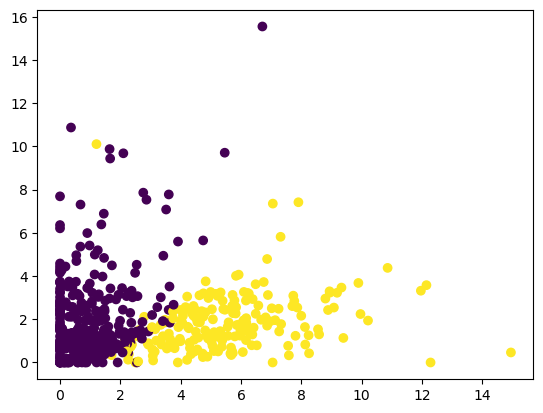

In [88]:
import matplotlib.pyplot as plt

plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
plt.show()

18/18 [==============================] - 0s 545us/step


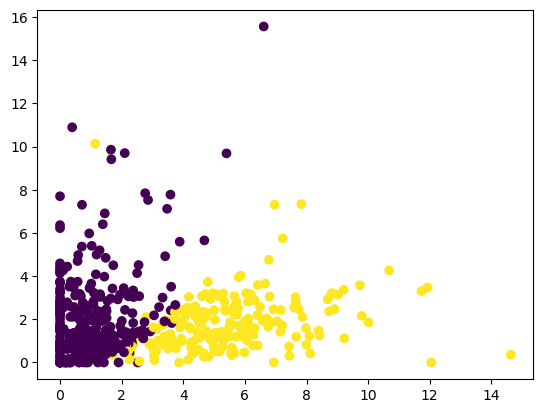

Epoch 1/2
8/8 [==============================] - 0s 5ms/step - loss: 0.3619 - val_loss: 0.3424
Epoch 2/2
18/18 [==============================] - 0s 556us/step


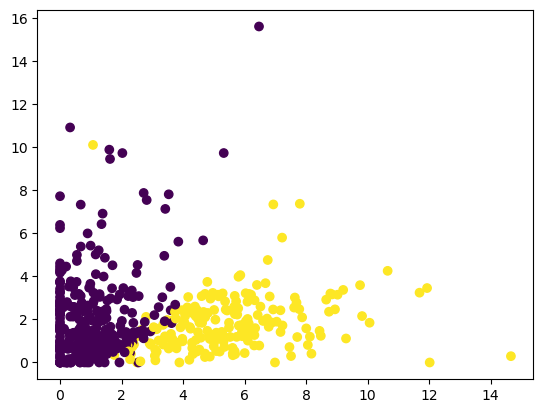

Epoch 1/3
8/8 [==============================] - 0s 5ms/step - loss: 0.3613 - val_loss: 0.3421
Epoch 2/3
8/8 [==============================] - 0s 3ms/step - loss: 0.3612 - val_loss: 0.3425
Epoch 3/3
18/18 [==============================] - 0s 548us/step


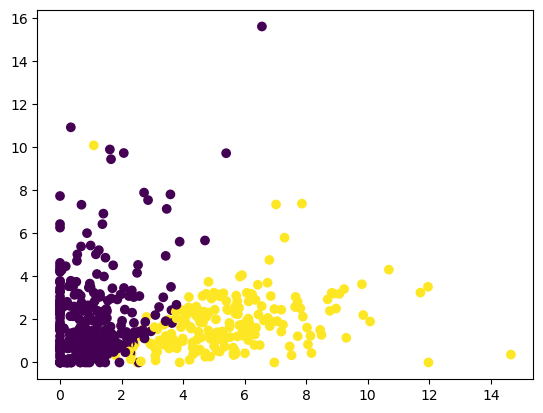

Epoch 1/4
8/8 [==============================] - 0s 5ms/step - loss: 0.3611 - val_loss: 0.3428
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 0.3609 - val_loss: 0.3426
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 0.3608 - val_loss: 0.3422
Epoch 4/4
18/18 [==============================] - 0s 548us/step


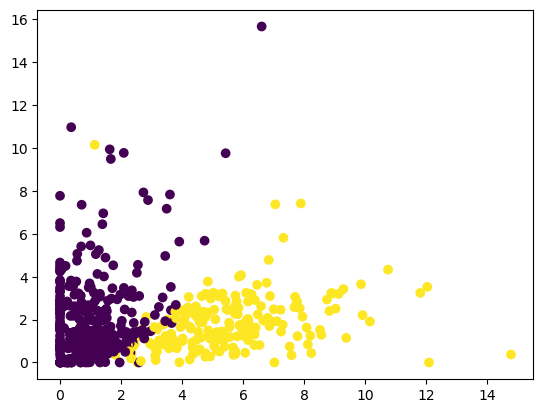

Epoch 1/5
8/8 [==============================] - 0s 5ms/step - loss: 0.3607 - val_loss: 0.3425
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 0.3604 - val_loss: 0.3422
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 0.3604 - val_loss: 0.3420
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 0.3603 - val_loss: 0.3418
Epoch 5/5
18/18 [==============================] - 0s 467us/step


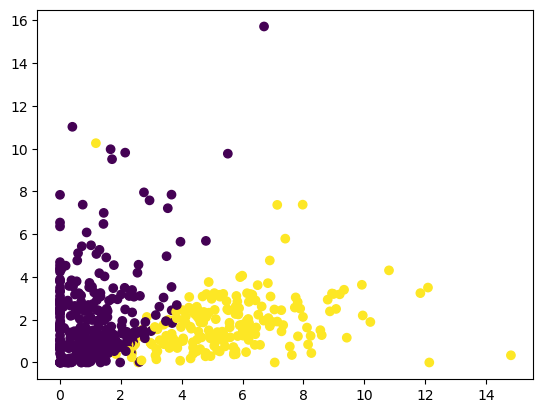

Epoch 1/6
8/8 [==============================] - 0s 5ms/step - loss: 0.3601 - val_loss: 0.3422
Epoch 2/6
8/8 [==============================] - 0s 3ms/step - loss: 0.3600 - val_loss: 0.3424
Epoch 3/6
8/8 [==============================] - 0s 3ms/step - loss: 0.3599 - val_loss: 0.3418
Epoch 4/6
8/8 [==============================] - 0s 3ms/step - loss: 0.3598 - val_loss: 0.3420
Epoch 5/6
8/8 [==============================] - 0s 3ms/step - loss: 0.3597 - val_loss: 0.3419
Epoch 6/6
18/18 [==============================] - 0s 498us/step


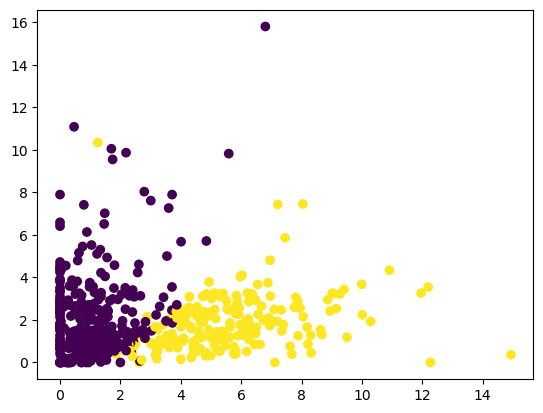

Epoch 1/7
8/8 [==============================] - 0s 5ms/step - loss: 0.3598 - val_loss: 0.3416
Epoch 2/7
8/8 [==============================] - 0s 3ms/step - loss: 0.3594 - val_loss: 0.3414
Epoch 3/7
8/8 [==============================] - 0s 3ms/step - loss: 0.3594 - val_loss: 0.3420
Epoch 4/7
8/8 [==============================] - 0s 3ms/step - loss: 0.3592 - val_loss: 0.3421
Epoch 5/7
8/8 [==============================] - 0s 3ms/step - loss: 0.3593 - val_loss: 0.3417
Epoch 6/7
8/8 [==============================] - 0s 3ms/step - loss: 0.3590 - val_loss: 0.3420
Epoch 7/7
18/18 [==============================] - 0s 540us/step


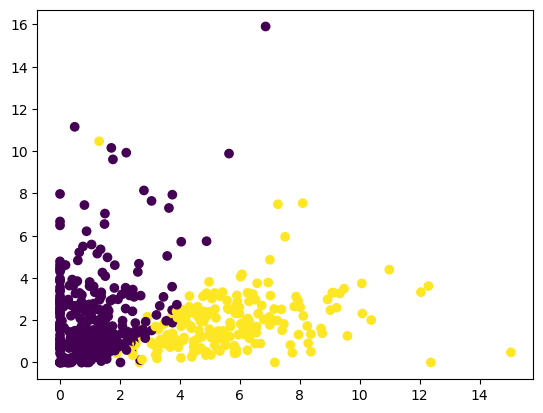

Epoch 1/8
8/8 [==============================] - 0s 5ms/step - loss: 0.3590 - val_loss: 0.3415
Epoch 2/8
8/8 [==============================] - 0s 3ms/step - loss: 0.3588 - val_loss: 0.3416
Epoch 3/8
8/8 [==============================] - 0s 3ms/step - loss: 0.3587 - val_loss: 0.3417
Epoch 4/8
8/8 [==============================] - 0s 3ms/step - loss: 0.3587 - val_loss: 0.3413
Epoch 5/8
8/8 [==============================] - 0s 3ms/step - loss: 0.3585 - val_loss: 0.3412
Epoch 6/8
8/8 [==============================] - 0s 3ms/step - loss: 0.3584 - val_loss: 0.3412
Epoch 7/8
8/8 [==============================] - 0s 3ms/step - loss: 0.3584 - val_loss: 0.3414
Epoch 8/8
18/18 [==============================] - 0s 507us/step


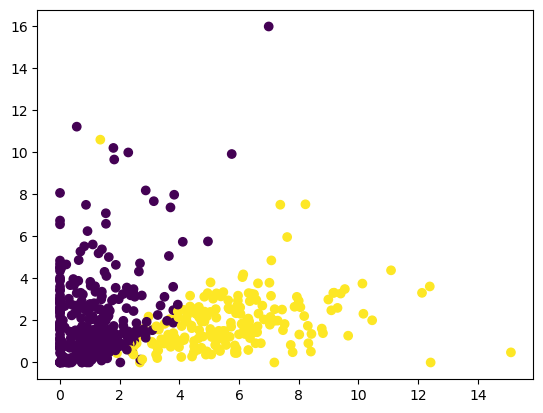

Epoch 1/9
8/8 [==============================] - 0s 5ms/step - loss: 0.3582 - val_loss: 0.3412
Epoch 2/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3581 - val_loss: 0.3411
Epoch 3/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3582 - val_loss: 0.3412
Epoch 4/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3580 - val_loss: 0.3416
Epoch 5/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3579 - val_loss: 0.3413
Epoch 6/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3578 - val_loss: 0.3412
Epoch 7/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3577 - val_loss: 0.3409
Epoch 8/9
8/8 [==============================] - 0s 3ms/step - loss: 0.3577 - val_loss: 0.3410
Epoch 9/9
18/18 [==============================] - 0s 500us/step


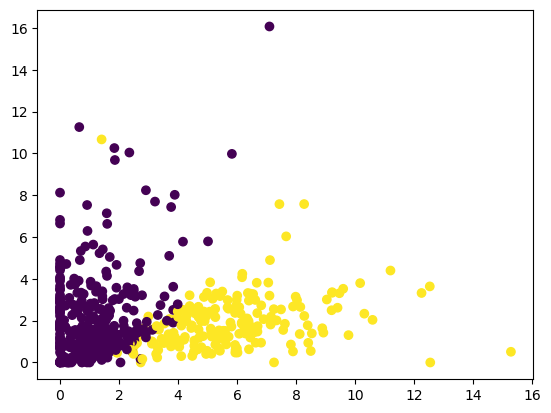

Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3575 - val_loss: 0.3416
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3574 - val_loss: 0.3411
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3574 - val_loss: 0.3412
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3572 - val_loss: 0.3408
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3571 - val_loss: 0.3407
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3571 - val_loss: 0.3409
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3569 - val_loss: 0.3408
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3568 - val_loss: 0.3408
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3568 - val_loss: 0.3414
Epoch 10/10
18/18 [==============================] - 0s 564us/step


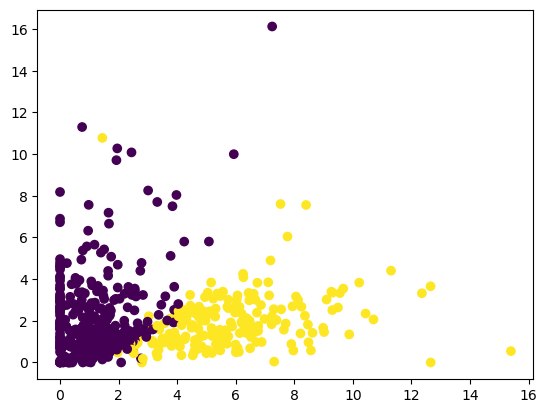

In [89]:
for epoch in range(10):
    autoencoder.fit(X,X, epochs = epoch+1, batch_size = 64, validation_split = 0.1)
    embeddings = encoder.predict(X)
    plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
    plt.show()
    